# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# G-Drive access to import csv file

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:

link='https://drive.google.com/file/d/1_SOEmzG6WxW96pNSGE8dVhjJouzWtNgV/view?usp=sharing'
id = link.split("/")[-2]

downloaded=drive.CreateFile({'id':id})
downloaded.GetContentFile('dataScienceTask.csv')
bd=pd.read_csv('dataScienceTask.csv')
display(bd)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,2,Moderate,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,"5,333.90","4,818.42"
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Elective,Hosp Basd Medicare Approved Swing Bed,2015,55,Fluid and electrolyte disorders,0,NO PROC,422,Hypovolemia & related electrolyte disorders,10,"Endocrine, Nutritional and Metabolic Diseases ...",2,Moderate,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,"4,865.99","4,588.78"
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,4,Urgent,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis ...,202,ELECTROCARDIOGRAM,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,"5,901.54","5,559.56"
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,2,Elective,Home or Self Care,2015,55,Fluid and electrolyte disorders,0,NO PROC,249,"Other gastroenteritis, nausa & vomiting",6,Diseases and Disorders of the Digestive System,2,Moderate,Minor,Medical,Medicare,NaN,NaN,0,N,Y,"3,619.08","3,567.25"
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,2,Elective,Home or Self Care,2015,122,Pneumonia (except that caused by tuberculosis ...,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,1,Minor,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,"3,185.87","3,167.89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,2,Emergency,Home or Self Care,2015,112,Transient cerebral ischemia,0,NO PROC,47,Transient ischemia,1,Diseases and Disorders of the Nervous System,2,Moderate,Moderate,Medical,Medicare,Medicare,Private Health Insurance,0,N,Y,"43,494.00","5,588.26"
2346927,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,117,M,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2015,54,Gout and other crystal arthropathies,159,OT DX PRCS ON MUSC/SKEL,351,Other musculoskeletal system & connective tiss...,8,Diseases and Disorders of the Musculoskeletal ...,1,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,0,N,Y,"16,662.00","2,907.62"
2346928,NaN,NaN,NaN,NaN,Redacted for Confidentiality,50 to 69,NaN,M,White,Unknown,2,Urgent,Home or Self Care,2015,657,Mood disorders,0,NO PROC,751,Major depressive disorders & other/unspecified...,19,Mental Diseases and Disorders,1,Minor,Minor,Medical,Medicaid,NaN,NaN,0,N,N,"7,142.00","1,692.55"
2346929,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2015,106,Cardiac dysrhythmias,0,NO PROC,201,Cardiac arrhythmia & conduction disorders,5,Diseases and Disorders of the Circulatory System,1,Minor,Moderate,Medical,

Getting Nan values in each column.

In [ ]:
bd.isna().sum()

Health Service Area                       5464
Hospital County                           5464
Operating Certificate Number              5464
Facility Id                               5464
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      35816
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

# Dropping NaNs
Since the payment typology 2 and payment typology 3 have 32.48% and 70.11% of NaN values, we can drop these columns as there would not be much loss of information. Tasks:

(a) dropping all NaN values

(b) replacing length of stay with values 120+ by 121

(c) dropping $ sign from total costs and total charges

(d) replacing zip code OOS with 999

In [ ]:
bd1=bd.drop(['Payment Typology 2','Payment Typology 3'],axis=1)
bd1=bd1.dropna(subset=['Health Service Area','Hospital County','Operating Certificate Number','Operating Certificate Number','Facility Id','Zip Code - 3 digits','APR Severity of Illness Description','APR Risk of Mortality'])

In [ ]:
bd1.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [ ]:
bd1["Length of Stay"].replace({"120 +": "121"},inplace=True)

In [ ]:
bd1["Zip Code - 3 digits"].replace({"OOS": "999"},inplace=True)

In [ ]:
bd1["Total Charges"]=bd1["Total Charges"].str.replace(',','')
bd1["Total Costs"]=bd1["Total Costs"].str.replace(',','')
bd1["Total Charges"]=bd1["Total Charges"].str.replace('$','').astype(float)
bd1["Total Costs"]=bd1["Total Costs"].str.replace('$','').astype(float)

In [ ]:
bd1["Length of Stay"]=bd1["Length of Stay"].astype(int)
bd1["Zip Code - 3 digits"]=bd1["Zip Code - 3 digits"].astype(int)

# Newborn Dataset

In [ ]:
newborn_bd=bd1[bd1['Type of Admission'].str.contains('Newborn')]

In [ ]:
newborn_bd.shape
newborn_bd.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                      int64
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                           int64
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

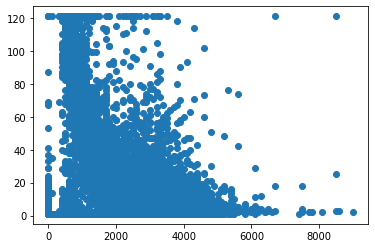

In [ ]:
plt.scatter(newborn_bd["Birth Weight"],newborn_bd["Length of Stay"])
plt.show()

As inferred from the scatterplot of the dataset, Newborn category refers to people of age 0 to 17.

In [ ]:
filter_LoS=newborn_bd["Length of Stay"]>100
newborn_bd1=newborn_bd[filter_LoS]

In [ ]:
A=newborn_bd1.groupby(['CCS Procedure Description'])['CCS Procedure Description'].count()

In [ ]:
A

CCS Procedure Description
ABDOMINAL PARACENTESIS       1
AORTIC RESECTION; REPL       1
BLOOD TRANSFUSION            2
CARDIAC PACEMAKER/DEFIB      1
CIRCUMCISION                 3
COLORECTAL RESECTION         4
COLOSTOMY; TEMP/PERM         1
DES LES RETINA/CHOROID       1
DIAGNOSTIC SPINAL TAP        2
ENTERAL/PARENTERAL NUTR      8
EXCISION; LYS PERI ADHS      1
EXTRA CIRC AUX OPEN HRT      2
GASTROSTOMY; TEMP/PERM       2
HEART VALVE PRCS             1
INGUINAL/FEMORAL HERNIA      7
IRR XCRANIAL VENT SHUNT      5
NO PROC                      1
OPHTHALM-/OT-OLOGIC DX       4
OT DX RADIO & RELATED        1
OT NON-OR THER NERV SYS      2
OT OR LOW GI THER PRCS       6
OT OR PRCS VES NOT HEAD     29
OT OR RX PRCS RESP SYS       2
OT OR UP GI THER PRCS        4
OT ORGAN TRANSPLANTATN       1
OT VASC CATH; NOT HEART      8
OT VASCULAR BYP/SHUNT        2
OTHER OR HEART PRCS          3
OTHER OR THER NERV SYS       3
OTHER OR THER PRCS NOSE      1
OTHER RESP THERAPY           1
OTHER THERAPE

From above result, we can see that the most number of procedures received by newborns is RESP INTUB/MECH VENTIL, hence we can conclude that the type of diseases for which the newborns received treatment is Respiratory.


#Comparison of Length of Stay of White women 18-29 or Black men 30-69

In [ ]:
#Codes for theoretically comparing the length of stay of White women 18-29 or Black men 30-69
#filter_q4 =  (bd1["Gender"] =="F")&(bd1['Race'] == "White") & (bd1['Age Group'] == "18 to 29")
#bd2=bd1[filter_q4]
#bd2.describe()

In [ ]:
#filter1_q4 =  (bd1["Gender"] =="M")&(bd1['Race'] == "Black/African American") & ((bd1['Age Group'] == "30 to 49")|(bd1['Age Group'] == "50 to 69"))
#bd3=bd1[filter1_q4]
#bd3.describe()


Using Graphs


In [ ]:
bd4=bd1[bd1['Gender'].str.contains('M')] # considering only males
bd4.drop(bd4.index[bd4['Race'] == "Other Race"], inplace = True)#considering only black and white race and dropping other races
bd4.drop(bd4.index[bd4['Race'] == "Multi-racial"], inplace = True)

bd5=bd1[bd1['Gender'].str.contains('F')]#considering only females
bd5.drop(bd5.index[bd5['Race'] == "Other Race"], inplace = True)#considering only black and white race and dropping other races
bd5.drop(bd5.index[bd5['Race'] == "Multi-racial"], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[(0.0, 20.0)]

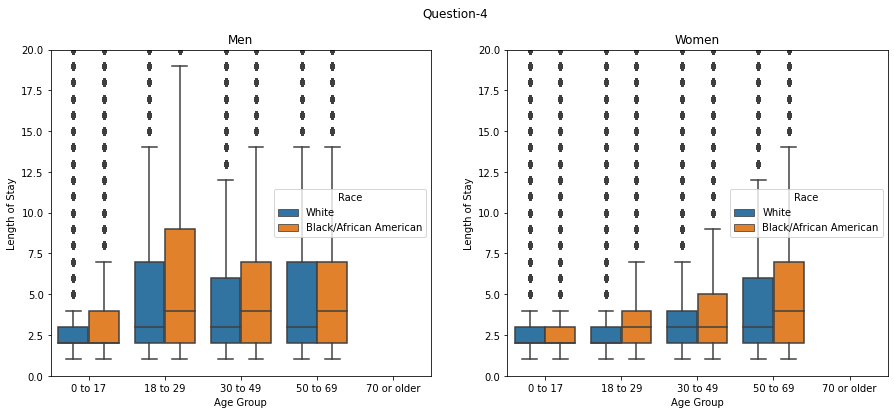

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)
fig.suptitle('Question-4')
sns.boxplot(ax=axes[0],x= "Age Group", y="Length of Stay", hue="Race", data= bd4,order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or older'])
axes[0].set_title('Men')
axes[0].set(ylim=(0,20))
sns.boxplot(ax=axes[1],x= "Age Group", y="Length of Stay", hue="Race", data= bd5,order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or older'])
axes[1].set_title('Women')
axes[1].set(ylim=(0,20))

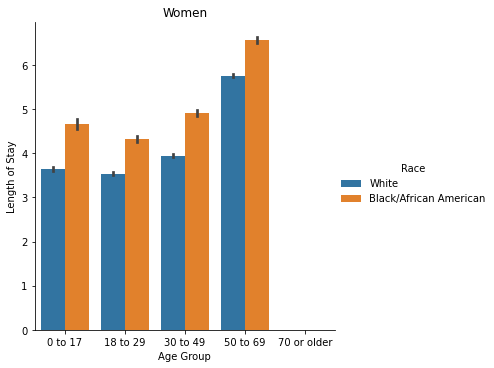

In [ ]:
sns.catplot(data=bd5, kind="bar", x="Age Group", y="Length of Stay", hue="Race",order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or older']).set(title='Women')


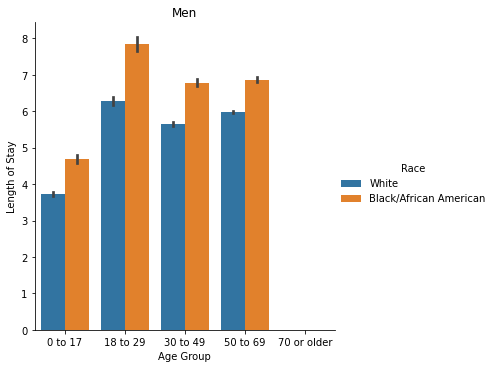

In [ ]:
sns.catplot(data=bd4, kind="bar", x="Age Group", y="Length of Stay", hue="Race",order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or older']).set(title='Men')

From the above plots, it is evident that Black men of age group 30-69 have stayed longer.

#The bottom 5 diagnoses with the shortest average length of stay

In [ ]:
bd6=bd1[['CCS Diagnosis Description','Length of Stay']].groupby('CCS Diagnosis Description',as_index=False).mean()
bd6=bd6.sort_values(by='Length of Stay',ascending=True,ignore_index=True)
display(bd6[len(bd6)-5:len(bd6)])

,CCS Diagnosis Description,Length of Stay
254,Schizophrenia and other psychotic disorders,17.186511
255,Leukemias,19.810576
256,Tuberculosis,21.684959
257,Respiratory distress syndrome,23.441048
258,Short gestation; low birth weight; and fetal g...,31.290244


#The top 5 diagnoses that cost hospitals the most money

In [ ]:
bd7=bd1[['CCS Diagnosis Description','Total Costs']].groupby('CCS Diagnosis Description',as_index=False).mean()
bd7=bd7.sort_values(by='Total Costs',ascending=False,ignore_index=True)
display(bd7[0:5])

,CCS Diagnosis Description,Total Costs
0,Leukemias,76951.367574
1,Short gestation; low birth weight; and fetal g...,67843.720537
2,Heart valve disorders,55756.266929
3,Respiratory distress syndrome,54879.051703
4,Hodgkin`s disease,52965.968158


#Correlation between the length of stay, cost and diagnosis

In [ ]:
bd8=bd1[['CCS Diagnosis Description','Total Costs','Length of Stay']].groupby('CCS Diagnosis Description',as_index=False).mean()
#bd8=bd8.sort_values(by='Total Costs',ascending=False,ignore_index=True)
display(bd8)

,CCS Diagnosis Description,Total Costs,Length of Stay
0,Abdominal hernia,16560.720402,4.783296
1,Abdominal pain,7054.719485,2.932155
2,Acquired foot deformities,16407.029647,3.497059
3,Acute and chronic tonsillitis,6529.424414,1.870349
4,Acute and unspecified renal failure,14521.599572,6.521208
...,...,...,...
254,Tuberculosis,52425.569553,21.684959
255,Umbilical cord complication,5971.342598,2.372010
256,Urinary tract infections,9914.639345,4.832665
257,Varicose veins of lower extremity,13568.092975,5.731183


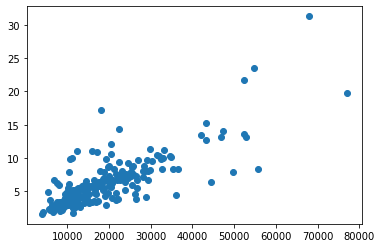

In [ ]:
plt.scatter(bd8["Total Costs"],bd8["Length of Stay"])
plt.show()

In [ ]:
bd8['Total Costs'].corr(bd8['Length of Stay'])

0.8023287650414812

From the above scatter plot and the correlation index obtained, it is clear that there exists a correlation between the length of stay, cost and diagnosis.


#Linear regression model to predict length of stay


In [ ]:
county = bd1['Hospital County'].unique().tolist()
zip = bd1['Zip Code - 3 digits'].unique().tolist()
print("Number of Hospital County's:",len(county))
print("Number of Zipcodes:",len(zip))

Number of Hospital County's: 57
Number of Zipcodes: 50


In [ ]:
#Above, we can see hospital county and zipcode do not encode same info.

facilities = bd1['Facility Id'].unique().tolist()
facilityname = bd1['Facility Name'].unique().tolist()
print("Number of Facility Ids:",len(facilities))
print("Number of Facility Names:",len(facilityname))

Number of Facility Ids: 213
Number of Facility Names: 223


In [ ]:
#Above, We can see that these most likely encode the same info even though they are on off, so we'll drop the names column

diag_code = bd1['CCS Diagnosis Code'].unique().tolist()
diag_des = bd1['CCS Diagnosis Description'].unique().tolist()
print("Number of Diagnosis Codes:",len(diag_code))
print("Number of Diagnosis Descriptions:",len(diag_des))

Number of Diagnosis Codes: 259
Number of Diagnosis Descriptions: 259


In [ ]:
#Above, Diagnosis Codes and Descriptions encode the same info so we'll drop the descriptions.

proc_code = bd1['CCS Procedure Code'].unique().tolist()
proc_des = bd1['CCS Procedure Description'].unique().tolist()
print("Number of Procedure Codes:",len(proc_code))
print("Number of Procedure Descriptions:",len(proc_des))

Number of Procedure Codes: 230
Number of Procedure Descriptions: 230


In [ ]:
#Above, Procedure Codes and Descriptions encode the same info so we will drop the descriptions.

drg_code = bd1['APR DRG Code'].unique().tolist()
drg_des = bd1['APR DRG Description'].unique().tolist()
print("Number of DRG Codes:",len(drg_code))
print("Number of DRG Descriptions:",len(drg_des))

Number of DRG Codes: 308
Number of DRG Descriptions: 308


In [ ]:
#Above, DRG codes and Descriptions encode same info, so dropping the descriptions.

mdc_code = bd1['APR MDC Code'].unique().tolist()
mdc_des = bd1['APR MDC Description'].unique().tolist()
print("Number of MDC Codes:",len(mdc_code))
print("Number of MDC Descriptions:",len(mdc_des))
#Same number of unique values, so drop descriptions

Number of MDC Codes: 24
Number of MDC Descriptions: 24


In [ ]:
#Above, MDC codes and Descriptions encode same info, so dropping the descriptions.

Creating another dataset containing only the required information and dropping the redundant columns.

In [ ]:
bd9=bd1.drop(['Zip Code - 3 digits','Facility Name','CCS Diagnosis Description','CCS Procedure Description','APR DRG Description','APR MDC Description','Discharge Year','Operating Certificate Number','Ethnicity','Hospital County','Birth Weight','Patient Disposition','APR Severity of Illness Description','Abortion Edit Indicator'],axis=1)

In [ ]:
bd9.shape

(2311006, 18)

In [ ]:
bd1.shape

(2311006, 32)

In [ ]:
bd9.dtypes

Health Service Area                  object
Facility Id                         float64
Age Group                            object
Gender                               object
Race                                 object
Length of Stay                        int64
Type of Admission                    object
CCS Diagnosis Code                    int64
CCS Procedure Code                    int64
APR DRG Code                          int64
APR MDC Code                          int64
APR Severity of Illness Code          int64
APR Risk of Mortality                object
APR Medical Surgical Description     object
Payment Typology 1                   object
Emergency Department Indicator       object
Total Charges                       float64
Total Costs                         float64
dtype: object

Labelling and encoding the categorical data in dataframe.

In [ ]:
risk = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}
age = {'0 to 17': 1, '18 to 29': 2, '30 to 49': 3, '50 to 69': 4, '70 or Older': 5}
gender={'F':1,'M':2,'U':3}
admission={'Urgent':1,'Elective':2,'Emergency':3,'Newborn':4,'Not Available':5,'Trauma':6}
race={'White': 1, 'Other Race': 2, 'Black/African American': 3, 'Multi-racial': 4}
aprmsd={'Medical':1,'Surgical':2}

bd9['Age Group'] = bd9['Age Group'].apply(lambda x: age[x])
bd9['APR Risk of Mortality'] = bd9['APR Risk of Mortality'].apply(lambda x: risk[x])
bd9['Gender'] = bd9['Gender'].apply(lambda x: gender[x])
bd9['Type of Admission'] = bd9['Type of Admission'].apply(lambda x: admission[x])
bd9['Race'] = bd9['Race'].apply(lambda x: race[x])
bd9['APR Medical Surgical Description'] = bd9['APR Medical Surgical Description'].apply(lambda x: aprmsd[x])
display(bd9)

,Health Service Area,Facility Id,Age Group,Gender,Race,Length of Stay,Type of Admission,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,37.0,5,1,1,4,1,122,0,139,4,2,1,1,Medicare,Y,5333.90,4818.42
1,Western NY,37.0,5,1,1,4,2,55,0,422,10,2,2,1,Medicare,Y,4865.99,4588.78
2,Western NY,37.0,5,1,1,4,1,122,202,139,4,1,1,1,Medicare,Y,5901.54,5559.56
3,Western NY,37.0,4,1,1,2,2,55,0,249,6,2,1,1,Medicare,Y,3619.08,3567.25
4,Western NY,37.0,5,2,1,2,2,122,0,139,4,1,2,1,Medicare,Y,3185.87,3167.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346925,Long Island,943.0,5,1,1,2,3,155,0,254,6,3,3,1,Medicare,Y,18847.00,3391.16
2346926,Long Island,943.0,5,2,1,2,3,112,0,47,1,2,2,1,Medicare,Y,43494.00,5588.26
2346927,Long Island,943.0,4,2,1,1,3,54,159,351,8,1,1,1,Private Health Insurance,Y,16662.00,2907.62
2346929,Long Island,943.0,5,2,1,1,3,106,0,201,5,1,2,1,Medicare,Y,13070.00,2447.75


One-hot encoding of all columns whose dtype is object is performed.

In [ ]:
bd10=pd.get_dummies(bd9)
bd10['Facility Id']=bd10['Facility Id'].astype(int)
bd10.dtypes
bd11=bd10.copy()

In [ ]:
bd10['Facility Id'] = bd10['Facility Id'].astype('category')
bd10['CCS Diagnosis Code'] = bd10['CCS Diagnosis Code'].astype('category')
bd10['CCS Procedure Code'] = bd10['CCS Procedure Code'].astype('category')
bd10['APR DRG Code'] = bd10['APR DRG Code'].astype('category')
bd10['APR MDC Code'] = bd10['APR MDC Code'].astype('category')
bd10['APR Severity of Illness Code'] = bd10['APR Severity of Illness Code'].astype('category')

In [ ]:
bd10.columns

Index(['Facility Id', 'Age Group', 'Gender', 'Race', 'Length of Stay',
       'Type of Admission', 'CCS Diagnosis Code', 'CCS Procedure Code',
       'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Total Charges', 'Total Costs', 'Health Service Area_Capital/Adirond',
       'Health Service Area_Central NY', 'Health Service Area_Finger Lakes',
       'Health Service Area_Hudson Valley', 'Health Service Area_Long Island',
       'Health Service Area_New York City',
       'Health Service Area_Southern Tier', 'Health Service Area_Western NY',
       'Payment Typology 1_Blue Cross/Blue Shield',
       'Payment Typology 1_Department of Corrections',
       'Payment Typology 1_Federal/State/Local/VA',
       'Payment Typology 1_Managed Care, Unspecified',
       'Payment Typology 1_Medicaid', 'Payment Typology 1_Medicare',
       'Payment Typology 1_Miscellaneous/Other',
       'Payment Typology 1_Pri

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X = bd10.drop(['Length of Stay','Total Charges','Total Costs'], axis=1) #remove data leakage features
y = bd10[['Length of Stay']]

Xdata=X[['Facility Id', 'Age Group', 'Gender', 'Race',
       'Type of Admission', 'CCS Diagnosis Code', 'CCS Procedure Code',
       'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Health Service Area_Capital/Adirond',
       'Health Service Area_Central NY', 'Health Service Area_Finger Lakes',
       'Health Service Area_Hudson Valley', 'Health Service Area_Long Island',
       'Health Service Area_New York City',
       'Health Service Area_Southern Tier', 'Health Service Area_Western NY',
       'Payment Typology 1_Blue Cross/Blue Shield',
       'Payment Typology 1_Department of Corrections',
       'Payment Typology 1_Federal/State/Local/VA',
       'Payment Typology 1_Managed Care, Unspecified',
       'Payment Typology 1_Medicaid', 'Payment Typology 1_Medicare',
       'Payment Typology 1_Miscellaneous/Other',
       'Payment Typology 1_Private Health Insurance',
       'Payment Typology 1_Self-Pay', 'Payment Typology 1_Unknown',
       'Emergency Department Indicator_N', 'Emergency Department Indicator_Y']].values
ydata=y['Length of Stay']
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

In [ ]:
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = accuracy_score(y_test, y_round_pred)
train_acc = accuracy_score(y_train, y_round_train_pred)
print(mse_test)
print(mse_train)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

51.204412902909155
52.42162725650535
Test accuracy: 0.14180256223117776
Train accuracy: 0.14138742316270467


In [ ]:
X_train.shape

(1617704, 32)

In [ ]:
y_train.shape


(1617704,)

In [ ]:
X_test.shape

(693302, 32)

In [ ]:
y_test.shape

(693302,)

#PCA (Principal Component Analysis)
Let us see if PCA can improve future model results and efficiency by scaling and reducing the dimensionality of the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
scaled_X=scaler.transform(X_train)
scaled_X

array([[-0.72186152,  0.41739385,  1.12265507, ..., -0.05182356,
        -0.84543228,  0.84543228],
       [-0.57018604,  1.14180313, -0.89070983, ..., -0.05182356,
        -0.84543228,  0.84543228],
       [ 0.17274289, -1.03142469, -0.89070983, ..., -0.05182356,
        -0.84543228,  0.84543228],
       ...,
       [-0.78365523, -0.30701542, -0.89070983, ..., -0.05182356,
         1.18282684, -1.18282684],
       [ 3.27787687, -1.75583396,  1.12265507, ..., -0.05182356,
         1.18282684, -1.18282684],
       [-0.88336781,  0.41739385,  1.12265507, ..., -0.05182356,
        -0.84543228,  0.84543228]])

In [ ]:
scaler.fit(X_test)
scaled_Xt=scaler.transform(X_test)
scaled_Xt

array([[-0.57093704,  1.14062192,  1.12227343, ..., -0.05114762,
        -0.84398411,  0.84398411],
       [-0.40169792,  0.41696119,  1.12227343, ..., -0.05114762,
         1.18485643, -1.18485643],
       [-0.05342897,  1.14062192,  1.12227343, ..., -0.05114762,
        -0.84398411,  0.84398411],
       ...,
       [-1.45769412, -0.30669954, -0.89101719, ..., -0.05114762,
        -0.84398411,  0.84398411],
       [ 0.83192944,  1.14062192, -0.89101719, ..., -0.05114762,
        -0.84398411,  0.84398411],
       [ 0.10322212,  1.14062192, -0.89101719, ..., -0.05114762,
        -0.84398411,  0.84398411]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca= PCA()

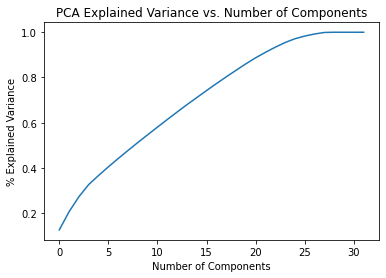

In [ ]:
pca.fit(scaled_X)

explained_variance_ratio = pca.explained_variance_ratio_
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pc_vs_variance)
plt.xlabel('Number of Components')
plt.ylabel('% Explained Variance')
plt.title('PCA Explained Variance vs. Number of Components')
plt.show()

In [ ]:
variance_95 = list(filter(lambda i: i > 0.95, pc_vs_variance))[0]
component_95 = pc_vs_variance.tolist().index(variance_95)
print(component_95)

#perform the dimensionality reduction
pca1 = PCA(n_components=component_95)
xx_train = pca1.fit_transform(scaled_X)
xx_test = pca1.transform(scaled_Xt)


23


From above, We can see that we can eliminate ~9 columns from the dataframe while retaining 95% explained variance in the data.

In [ ]:
pc_df = pd.DataFrame(pca1.components_,columns=X_train.columns)
top_pc = pc_df[0:1]
display(top_pc)

,Facility Id,Age Group,Gender,Race,Type of Admission,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Health Service Area_Capital/Adirond,Health Service Area_Central NY,Health Service Area_Finger Lakes,Health Service Area_Hudson Valley,Health Service Area_Long Island,Health Service Area_New York City,Health Service Area_Southern Tier,Health Service Area_Western NY,Payment Typology 1_Blue Cross/Blue Shield,Payment Typology 1_Department of Corrections,Payment Typology 1_Federal/State/Local/VA,"Payment Typology 1_Managed Care, Unspecified",Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y
0,0.111789,-0.378071,-0.035225,0.088212,-0.019767,0.222586,0.141484,0.300066,0.298309,-0.28657,-0.337778,0.000097,-0.032246,-0.017552,-0.032685,-0.010489,-0.065272,0.112169,-0.022301,-0.02572,0.071127,0.00304,0.013902,0.007808,0.228482,-0.352448,0.003644,0.103838,0.026846,0.002088,0.297113,-0.297113


Top 10 features that influence the length of stay most as obtained by pca are listed as follows:

In [ ]:
new_top_pc = top_pc.abs()
features = []
for i in range(0,10):
  features.append(new_top_pc.idxmax(axis=1).tolist())
  new_top_pc = new_top_pc.drop(columns=features[i])
print(features)

[['Age Group'], ['Payment Typology 1_Medicare'], ['APR Risk of Mortality'], ['APR DRG Code'], ['APR MDC Code'], ['Emergency Department Indicator_Y'], ['Emergency Department Indicator_N'], ['APR Severity of Illness Code'], ['Payment Typology 1_Medicaid'], ['CCS Diagnosis Code']]


Linear regression using PCA

In [ ]:
regr = LinearRegression().fit(xx_train, y_train)
y_train_pred = regr.predict(xx_train)
y_pred = regr.predict(xx_test)
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = accuracy_score(y_test, y_round_pred)
train_acc = accuracy_score(y_train, y_round_train_pred)
print(mse_test)
print(mse_train)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

55.104986218712014
54.35155055124009
Test accuracy: 0.12747547244923568
Train accuracy: 0.12675124744699895


Even after using PCA, linear regression model doesn't work great to fit and predict the length of stay. Hence PCA and linear regression model is a bad choice for the problem in hand.

#Random Forest Classifier

Let us try Random Forest classifier for the given problem.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [ ]:
rf= RandomForestClassifier(n_estimators=150, max_depth=10, class_weight='balanced')

In [ ]:
X = bd10.drop(['Length of Stay','Total Charges','Total Costs'], axis=1) #remove data leakage features
y = bd10[['Length of Stay']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
rf.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=150)

In [ ]:

train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.24909192287340576
Test Accuracy: 0.24186862290891992


Random Forest classifier works better than the linear regression models, however, it is still not satisfactory to model the given dataset.

# References
[1]  https://github.com/vtien/Predicting-Hospital-Stay-Project/blob/master/Hospital_Stay_Project_Blog_Edits.ipynb

[2]  https://www.coursera.org/learn/machine-learning-with-python/home/welcome

[3]  https://www-doh.state.nj.us/doh-shad/query/MDCtable.html

[4]  https://www.findacode.com/drg/drg-diagnosis-related-group-codes.html


